In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import exp
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bounds = (-5.12, 5.12)
dim_x = 50

In [ ]:
def rastrigin(X):
    A = 10
    delta = [x**2 - A * np.cos(2 * np.pi * x) for x in X]
    y = A*len(X) + sum(delta)
    return y

In [ ]:
def is_in_bound(value, bounds):

	for x in value:
		if bounds[0] > x or x > bounds[1]:
			return False

	return True

In [ ]:
def generate_solution(value, dim_x, bounds, step_size):
	if value is None:
		value = (rand(dim_x) - 0.5) * 2 * bounds[1]

		while not is_in_bound(value, bounds):
			value = (rand(dim_x) - 0.5) * 2 * bounds[1]

		return value

	neighbor = value + (rand(dim_x) - 0.5) * 2 * bounds[1] * step_size

	while not is_in_bound(neighbor, bounds):
		neighbor = value + (rand(dim_x) - 0.5) * 2 * bounds[1] * step_size

	return neighbor

In [ ]:
def simulated_annealing(problem, dim_x, bounds, n_iterations, step_size, temp):
	scores = []

	solution = generate_solution(None, dim_x, bounds, step_size)

	solution_eval = problem(solution)

	scores.append(solution_eval)

	print('init', solution, solution_eval)

	current, current_eval = solution, solution_eval

	for epoch in range(n_iterations):
		neighbor = generate_solution(current, dim_x, bounds, step_size)
		neighbor_eval = problem(neighbor)

		if neighbor_eval < solution_eval:
			solution = neighbor
			solution_eval = neighbor_eval
			scores.append(solution_eval)
			print(epoch+1, solution, solution_eval)

		diff = neighbor_eval - current_eval

		t = temp / float(epoch + 1)
		metropolis = exp(diff / t)

		if diff < 0 or rand() < metropolis:
			current, current_eval = neighbor, neighbor_eval

	print('final', solution, solution_eval)

	return scores

# Changing N
## If the number of iterations is too small the algorithm may not have enough time to converge

init [ 4.29563852  3.4780562   0.23535388  2.51706871 -3.3711762   0.55826755
  3.44232528  4.76418662 -2.06309144  0.22459608 -0.07442587 -4.08990463
 -0.35669673  0.94467429 -4.21995224  4.23983382  2.44992204  3.00804015
 -1.42706035 -4.1993399  -2.73365533 -0.44040351  4.72265365 -1.31919588
 -1.41599099  1.47101794  2.11301154  2.5463155  -4.6944164  -3.76579534
 -1.18112266  4.60706922 -0.96899164  3.74896972  4.59796305  4.21620393
 -5.06044008  1.86339023 -1.50165095 -3.34346819  3.04925976 -1.46603837
  1.39693946  2.16523392  3.98224925 -1.61818166 -4.34324264  4.37298052
  1.57234607 -1.8766454 ] 1030.0251065663815
1 [ 3.38401929  3.89325496  1.19959742  2.77016267 -3.73997991 -0.29412411
  2.67765125  4.63878795 -1.38349345  0.5922075  -0.40308479 -4.15393973
 -1.09859094  0.53383766 -4.22605124  3.86260698  1.91623877  3.36601812
 -1.26816511 -3.94050385 -3.48017536 -0.41401494  4.98115213 -1.87540383
 -2.38016428  1.77822209  2.76434887  1.99916881 -4.03097027 -2.79489817

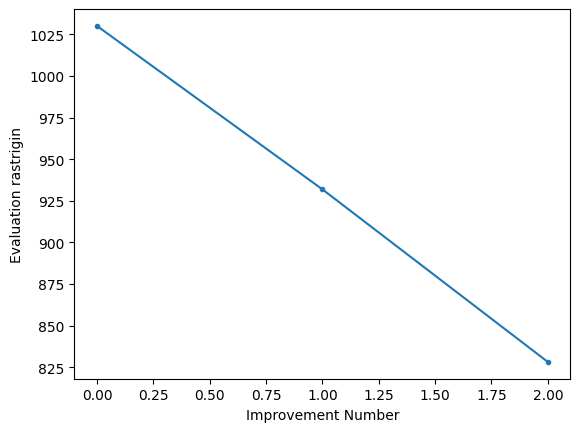

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 10, 0.2, 200)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

init [-3.48181313  0.64260029  4.91326255 -1.57522734  1.73660158  2.45801903
 -3.15994521  3.92654797 -1.16873469  3.33410041  0.87078416 -3.77113324
 -3.85688081 -1.0360552   1.24431634 -2.29992731  4.64478585 -3.41231657
 -2.05204319  1.76619623 -0.30237168 -3.46963573 -3.01894111  2.97303044
 -4.50763595  1.72519005 -3.97133585  2.2348505  -3.24295436 -0.82542901
 -4.33725435 -3.95871234  3.10875344 -1.47634839 -1.007872    5.05163268
 -4.60896043  0.16362321  2.66131515  3.78959585 -5.0553633   4.35414722
 -1.28937317  3.2900187  -3.17513208  1.24210425  4.92748752 -1.28745319
  1.13088558  1.70618304] 918.1786017329271
3 [-1.83738591  1.27834796  3.45866049 -1.8088335   2.36100773  1.61208442
 -4.96278998  2.71147834 -1.5583408   1.51135963  0.76781899 -3.36342179
 -3.17761414 -0.72222266  1.00191848 -3.90416943  3.52446119 -2.29965208
 -2.82469245  1.45367874 -1.06803632 -2.47066481 -3.19293629  5.02379101
 -4.24232563  4.03704122 -3.67610512  2.8930709  -2.99609445 -1.05420746


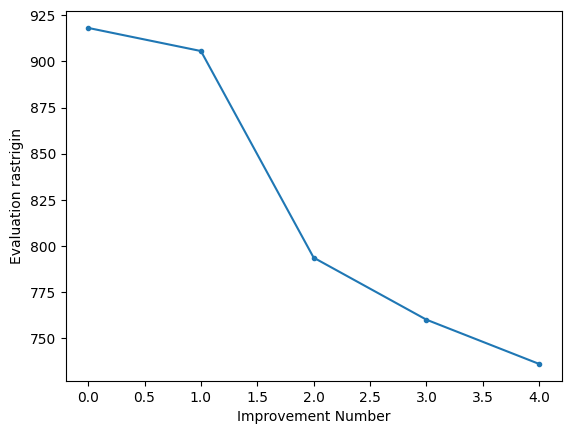

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 30, 0.2, 200)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

init [-2.96408077  0.273663   -0.20022706  1.85455845  4.68442618 -0.24405348
  1.05087998  2.69779892  1.59844984  4.38294196 -4.29982847 -3.91969331
  0.51894508 -2.41867437 -3.19502684 -1.58994993  3.28202885 -4.44147878
 -1.26968514 -2.701025   -3.10847082 -4.55484867  0.41785458 -2.20101914
 -1.35916114  2.59931207 -2.60679283  4.99379526  2.41681382 -2.15188684
 -1.25266188 -3.66972041  5.00441001  3.91090494 -2.34832708 -3.96695709
 -3.34973889  2.10065275 -5.06736795 -1.94006897  3.75256603 -3.8547511
  3.66636843  2.51631242 -0.09549139 -5.11149616  0.95316858  3.56002815
 -0.86937085  2.27660798] 959.7869989080377
1 [-2.75290618 -0.51340178 -0.61865656  1.38621864  4.29092685 -0.431217
  0.11765884  2.89702532  1.94016164  4.37393733 -3.93531546 -4.21783592
  0.99626044 -1.92447609 -2.26696967 -1.77669479  2.68641161 -3.983441
 -0.34718115 -2.40371465 -3.80878809 -4.87829768  0.26093689 -2.77948817
 -2.25034274  2.03204381 -3.0888154   4.51383176  2.8202748  -2.97146826
 -0.3

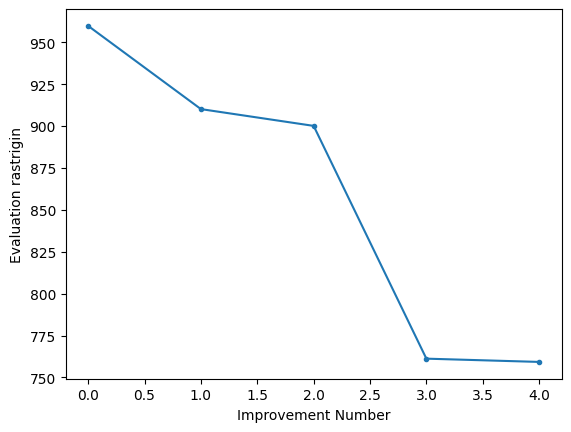

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 50, 0.2, 200)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

init [ 3.71365423 -2.45589822  0.61333381 -2.30423652 -4.85907774  5.09185075
 -3.00938013 -3.48152521 -5.10880641  4.43338654 -2.09952868 -2.00457667
  2.86800088  0.50155009  1.35687033  2.31465514  3.37143108 -0.45450591
  4.36624987 -4.83443971  0.55093184  4.70661921 -4.37908461  3.85644435
 -3.31873462  1.11118795  4.6738866  -0.31268194  4.94635569  1.26342883
 -4.66736642  4.48335325 -0.03357334 -0.01118852  4.96543375 -1.68167212
  2.21881969  0.51221024 -4.86768105 -1.57399091 -1.20348355 -2.00017169
 -5.07800081  1.89154527 -1.19133603 -0.9176389  -1.53259109  2.71708547
  0.77673695 -4.74270347] 1008.577283902024
1 [ 3.03222245 -1.69532891  0.91201937 -1.87966995 -4.71913264  4.88428618
 -3.27763235 -2.71807587 -4.74686371  4.66310436 -2.102644   -2.93289737
  2.99232091  1.24524673  1.15163634  2.18603668  4.21473118  0.00774074
  4.29950384 -4.05983969 -0.04484322  3.91004615 -4.70700071  3.10556954
 -2.52807297  1.70144213  4.98939889 -0.98684083  4.15994764  1.49132917


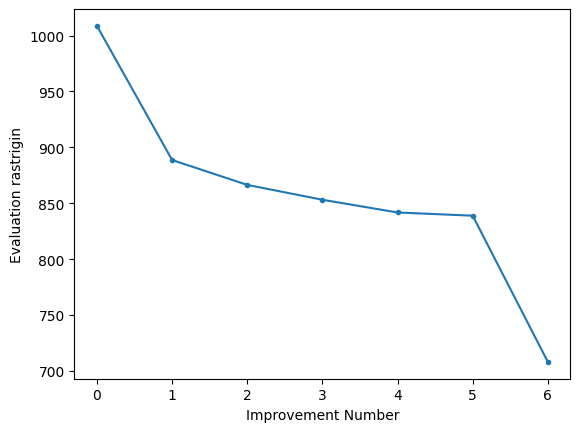

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 70, 0.2, 200)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

init [-2.91066935  1.91571673 -0.00513643 -3.506181   -2.00149665  5.0516853
 -1.84799164  3.97971816  2.98528136 -5.01433104 -2.05883386 -2.4894181
 -2.07482591  1.1814101  -4.02121589 -4.97692663  2.76594573  0.44098933
 -2.45115735  1.98716698 -2.76454451  1.25615876 -4.09638247 -3.79781594
 -3.0623723   3.33001715 -3.53330814  1.96272599  3.48567025  1.77106535
  2.81991655 -3.70502342  4.32071605  4.12190546 -4.80568553 -0.85014312
  3.99809666 -3.94222718 -3.81367945 -1.49048816 -4.14681801 -2.95979165
 -1.96412377  0.54378107 -1.7067308  -1.88818445 -1.50298557 -2.03142968
  0.67625978  1.38756618] 810.015304656688
14 [-3.65129574 -2.52860237  1.87537644 -4.2175387   1.13325766  3.64706195
  0.20408757  4.10888679  2.9479823  -1.42408598 -0.35296021 -4.10075293
 -0.842658    4.00754971 -3.64679512 -4.34431072  3.08621974  0.96790875
 -3.8515629  -2.24152745 -0.03319844  3.43309577 -3.8657341  -3.76349392
 -0.55937992  2.65939955 -3.22842988  0.13649387  2.10743453 -0.23288704
  

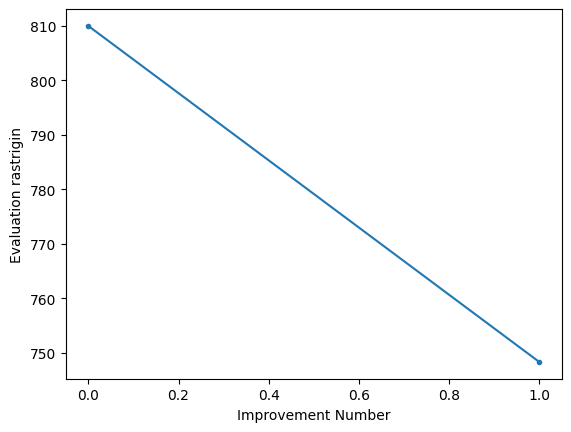

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 100, 0.2, 200)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

# Changing Alpha
## momentum-like, alpha controls the changing of the temperature.

init [ 3.38318652  1.23295143 -4.27381157 -3.34251001 -4.63891063 -0.20601852
  2.90391888  5.08849546  0.19446971  0.45761541 -0.70899399  3.17922789
  4.14050897 -3.63121363  0.99519506 -1.34232804  2.61897714  0.33350005
 -0.68875478 -3.8791231  -4.07088969  1.40483311 -1.38302525 -4.35386176
 -1.23082486  0.18415088  2.26892784 -2.85626371 -1.19980255  2.70000237
  4.34378498 -3.5461038   3.0149039   0.07753612 -0.18281664  0.29051827
 -0.75262166 -1.25671291 -1.037069   -0.68481659 -0.79371354 -1.55106558
  0.92451713  1.13749164  0.12353725  4.51048967  2.25501237  2.54041099
 -0.11452364  0.90128486] 799.9086111189874
final [ 3.38318652  1.23295143 -4.27381157 -3.34251001 -4.63891063 -0.20601852
  2.90391888  5.08849546  0.19446971  0.45761541 -0.70899399  3.17922789
  4.14050897 -3.63121363  0.99519506 -1.34232804  2.61897714  0.33350005
 -0.68875478 -3.8791231  -4.07088969  1.40483311 -1.38302525 -4.35386176
 -1.23082486  0.18415088  2.26892784 -2.85626371 -1.19980255  2.70000

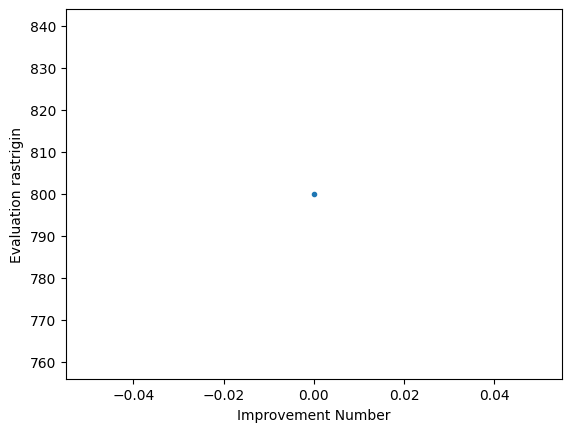

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 10, 0.4, 200)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

init [-3.29448006e-02 -1.71909448e+00  2.06485774e+00 -4.13542597e+00
 -6.46482567e-01 -2.40418579e+00 -4.97196050e+00 -3.43540938e+00
  3.71350259e+00 -2.39362483e+00  2.38412826e+00 -4.84757610e+00
 -3.09724423e+00 -5.79304339e-02 -4.68865233e+00  8.81791493e-01
 -9.01988684e-04 -6.67622290e-01 -2.13622025e+00 -1.26323074e+00
  3.82667335e+00 -3.24722180e+00  5.00036348e+00  1.68063558e+00
 -4.36922301e+00 -4.69066458e+00 -3.69636565e+00 -3.76385729e+00
  4.65941520e+00  2.96248186e+00 -1.82400156e+00  2.55263953e+00
 -2.46040469e+00 -4.76855515e+00  1.25460559e+00 -4.28773361e-01
  4.51726729e+00 -1.33377616e+00 -4.92049520e-01  3.61369738e+00
 -4.64669705e+00  2.31676068e+00 -1.01035814e-01 -1.24671878e+00
  3.87818777e+00 -4.29100369e+00  5.03311936e+00 -3.06319334e+00
 -2.82029040e+00  6.02026283e-01] 993.1556070856645
1 [ 0.40345336 -4.17650192  1.58996235 -1.60472788 -0.0847883  -4.49500928
 -2.99420956 -3.20598099  2.16388259 -2.28334446  4.85265294 -5.11729162
 -1.33885082  1

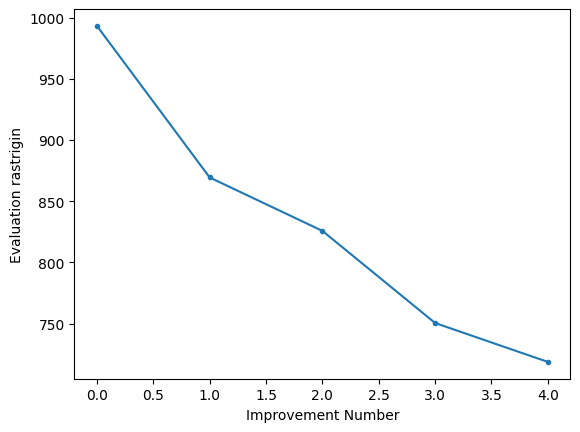

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 10, 0.5, 200)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

init [ 0.38368388 -0.2865108  -3.22723538 -1.54528624 -4.18936772  5.06672081
  3.30750537  3.91716217 -0.1827734  -3.90888881  4.3237957   3.65880219
  4.77787735  0.18533415 -3.67248496  3.24329428 -1.94115293 -4.62895805
 -2.49138547 -1.08303549  4.82346196 -1.75385411  0.4137747   4.41332663
 -2.50974087  4.47698688  4.48034643 -0.0071484  -4.7136335   4.62108118
  4.10995715 -0.01227186  4.58001583 -4.33765185  2.72408004  4.19074347
  2.88890035  2.27774643  3.99307336  3.94534865 -2.2788247   2.62069549
  2.68976301  0.54565481 -1.63440604  0.56297364  4.81001125 -0.71788909
  4.70333     4.81419819] 1104.5524700877684
1 [-0.71477735  0.8379875  -4.70434735  0.35147969 -4.88095031  3.7246196
  4.56575543  3.1500982  -0.18061658 -0.63924213  4.15708105  0.29903673
  1.80187237  2.59388234 -1.61770192  0.6179553  -4.14041193 -5.02681749
 -3.61507754 -3.03700922  2.10767963 -5.04205762 -1.36640522  4.02943797
 -1.61237876  1.00874303  4.96168183 -2.85969234 -3.4117458   1.13255393


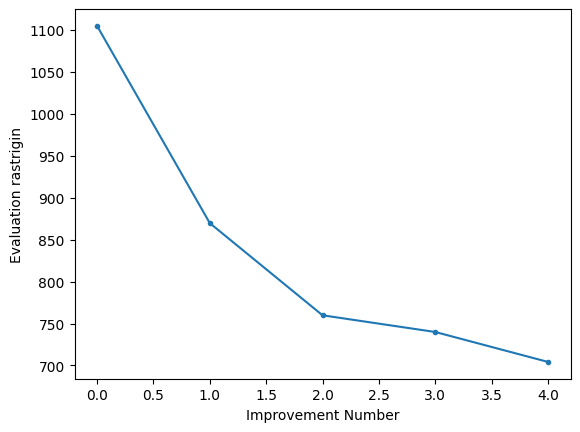

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 10, 0.7, 200)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

init [-1.3224495   3.62341077  2.44946605  2.55462701  0.13472918  0.05414774
 -5.05195666 -2.95525543  1.42166771  0.77661622 -1.67923429  0.61404578
 -4.67133014 -1.85251223 -2.88202826 -1.26764692  1.86032594  3.67189964
  1.07539787 -2.07406804  3.00981746  2.62582639 -3.35455501  0.22831258
 -2.25758202 -1.62796919 -3.85091965 -4.81483984  0.80864409 -2.41198469
 -2.87109569 -4.16258648 -1.89773354 -3.20794086 -1.22329039  2.63477738
  0.86294383 -2.37788495 -3.83695617  3.07600286  2.72408576 -5.08500318
 -4.77163951  3.32379008 -1.57874838  3.49216754  3.00790495  2.10831551
 -0.84248598  0.29843342] 834.1150079887104
4 [-3.31344539  1.84868955  0.20649049  2.57261901  0.13639735 -0.84947635
 -4.13690919 -1.4949449  -2.39800894  2.1087694  -2.14877575  2.81129685
 -4.94339056  2.67283777 -3.26330526  3.01010543  0.80550329  1.2613904
 -0.76541476  1.26426651  2.21456715 -3.38791474  1.46865686 -3.2295867
 -2.46632909  1.30618835  0.08076631 -0.12293789  3.13667556  0.05728017
  

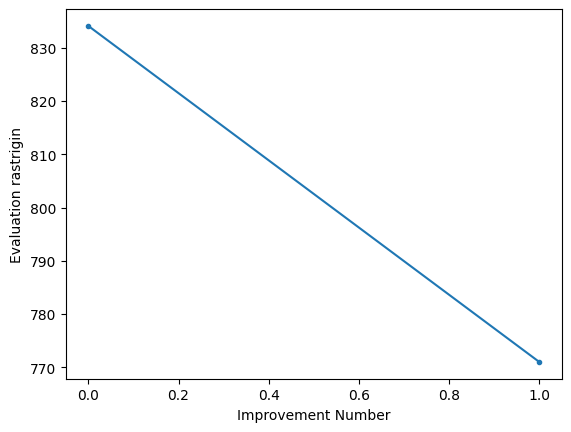

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 10, 0.9, 200)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

# Changing T
## Higher temp enables exploration which prevents getting stuck in local minima

init [-1.78973048  2.57848167 -3.12000037  0.11355196  4.1512653   4.10392158
 -4.84931559  4.42791961 -3.09319329  5.03948429 -1.21995636  1.48399298
 -1.46301144  4.76215474 -0.53952857 -2.14043563 -1.08366234 -4.80788891
  0.37169828  2.66855902  1.07132987 -2.76258999  4.65041587 -4.88740871
  0.29360222  4.73373586 -3.68495821 -3.93616936 -2.7383475   1.46066985
 -3.69746806 -3.95261919 -0.22996504 -4.26022339  0.06714212 -3.62785962
  4.69700954 -2.61680288  5.07045333  5.11713313 -0.44912007  4.9729569
  2.04228405 -2.70033072 -2.31614739 -2.54753383  3.64795801  2.05700978
 -0.48428291 -0.16972052] 993.442410008261
2 [-2.66124629  2.32066975 -3.93502958  1.12716359  2.62590073  2.66335528
 -3.64147104  5.08123453 -2.57235249  4.3618072   0.40676288  0.81734858
 -1.70343131  4.2298513  -0.88985312 -1.91341233 -0.99046634 -3.44668452
  1.5913376   2.03497996  0.20740927 -3.27650612  3.67652988 -4.52168018
  0.90367245  4.09148782 -2.73839817 -2.73325762 -3.08097151  2.63860658
 -

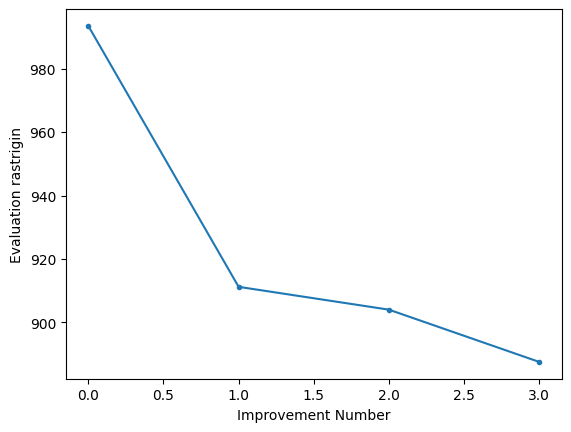

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 10, 0.2, 400)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

init [-2.79770011 -1.09433707 -0.05363983 -1.93952227  0.79767178 -4.66023415
  1.0971187  -4.56143479 -2.65358204  3.23499475  0.60947479  3.53374261
  4.397401   -3.04474499 -1.14598478  2.92550582  4.09777681  0.66862175
  0.43109928 -5.0039927   2.29125128 -1.84734619  1.23019162  0.5569503
 -3.28827185  0.7534923  -2.95385711 -0.53607715 -4.41459819  1.62792584
 -5.02960925  1.91297222  0.65104645 -1.5029856   0.49785241  5.11999497
 -0.49482501  2.32394     2.93266223  0.25011317 -1.53399542  2.66499478
  3.60616781 -0.63097504 -2.25292728  0.28781434  3.65325024  4.76221814
  4.79020528  4.44658846] 947.8593254584091
1 [-3.25406877 -0.58305886 -0.14963552 -2.68506978  0.75970662 -4.6595566
  1.85335379 -5.05196457 -3.0968522   3.57040543  1.14301397  2.5763936
  4.86293102 -3.39333126 -1.19878379  3.5279763   3.45806934 -0.15523372
  1.36104974 -4.48727275  1.7737802  -2.53721394  1.19084269  1.44553375
 -2.64993467  0.2389198  -2.18246568 -1.07014751 -3.82168087  1.86056139
 -4

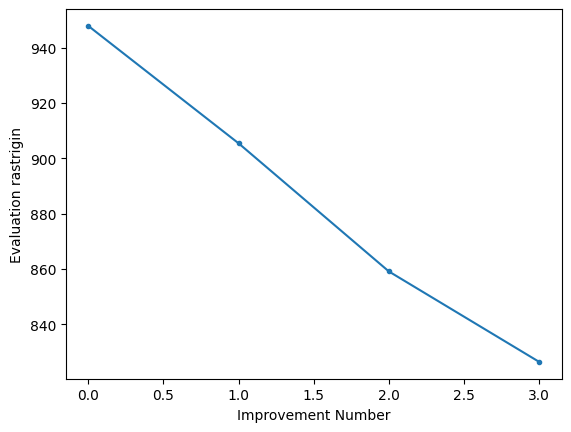

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 10, 0.2, 700)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

init [-2.68450575 -1.41255068  0.83106881  1.648974   -4.42463285  0.38087662
 -2.25796188 -1.53204317 -3.35350231  4.43864055  3.04114968 -0.86899863
 -1.33462429  4.10034098 -4.42822513 -0.26553797  0.84887551  4.9054423
  1.8147973   3.50126512 -0.42278305  1.07465341 -4.80344867  1.15230128
  0.15874506  4.18979608  2.76640048  1.36168866 -2.45176318  1.09580661
  5.02980088  0.75155237 -2.77895025 -2.37641412  4.6817761  -4.81613637
  0.20065198  1.21251192 -2.00899495 -0.81324862  1.92309081 -1.7231578
  4.78942723 -0.64298147  3.7012873   2.86110033  2.86669368  2.43571737
  4.06095369 -2.83417474] 884.501177437754
2 [-2.15233595 -1.59890304  2.04146122  2.08831909 -4.57502274  0.80197284
 -2.84947356 -1.16461029 -3.03299637  4.70338762  2.93425799  1.15158124
 -1.15185931  4.51332644 -4.34339542  1.67874061  1.45216894  4.30722938
  2.90344979  3.67294414  0.74707131  1.34446311 -4.27400861  0.99871749
 -0.81713673  3.86758424  4.52266595  1.22081312 -1.82645584  1.47212736
  3

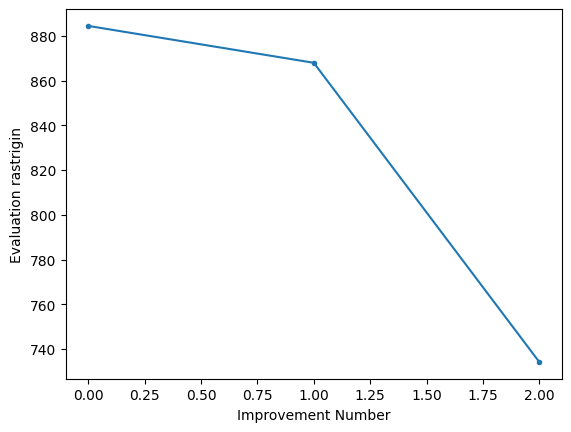

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 10, 0.2, 1000)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

init [ 3.09679283  0.09722348 -1.79478279 -4.82020505  3.69288418 -4.00544799
  3.4368932   3.54734462 -0.57065466 -2.50127922 -3.48653003 -4.42028122
  4.54959883  2.78927484 -3.25001731  2.91584338 -4.54033623  3.04472995
  3.12790411 -1.60316112  1.6229809  -1.47890837 -2.08429811 -3.8558231
 -1.91473272 -2.54583394  2.90575265 -4.03645159  1.98267955 -0.84314688
 -1.22131101 -3.14587094  1.5518502  -1.85649915 -2.95344716 -2.12699246
 -3.96926324  1.25807755  4.39099708  4.82067434 -4.07421006 -1.72709825
  0.54365106  1.09347267 -4.32637168 -2.8830531  -1.46160202 -3.96915653
  1.76107943 -4.85163911] 917.8807442270577
10 [ 3.30919594 -0.03002934  1.01103286 -1.90449602  2.09995408 -2.93294843
  2.28071266  2.28910386 -1.55015096 -4.93261006 -4.42601981 -3.86278392
  4.22268253  3.04652605 -4.96903836  4.00467817 -3.22866286  5.01315108
  0.38199557  0.50262262  4.87237896 -3.1992554  -2.64154747 -1.96798759
 -3.57289096 -1.12013378  2.68395892 -3.91205874  2.89276356 -0.86281874


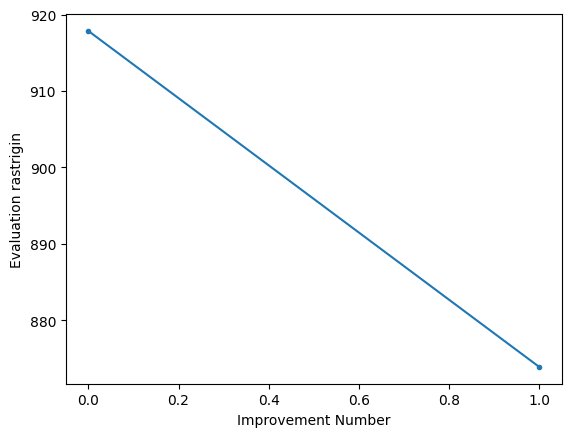

In [ ]:
scores = simulated_annealing(rastrigin, dim_x, bounds, 10, 0.2, 1500)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()